# Question 1 - b:

The CIFAR-10 dataset is a famous computer vision dataset. It consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Download the dataset using this link: https://www.cs.toronto.edu/~kriz/cifar.html

    b) Randomly choose 1000 images from the training set and put them in a 1000*3072-dimensional data matrix 𝐴 . Note that 3072 is 32*32*3 where 32
    is the height and weight of the images and 3 is the number of colors (channels). Run PCA dimensionality reduction method on data matrix 𝐴 and
    obtain the top 120 principal components (directions/components which show highest variation in the data). Report those components and show how
    much of data variation is represented by those 120 directions.

In [5]:
#To ignore tensorflow's numpy related warnings
import warnings
warnings.simplefilter("ignore")

## Libraries

The numpy library provides basic array convertion and type conversion for convenience. We used the CIFAR-10 dataset provided with tensorflow's keras. Since our goal is to plot images, we utilized the matplotlib for the plotting task. We implemented the random library to obtain random values for data entry selection. To implement principal component analysis (PCA) in our work, we utilized the PCA method provided by sklearn library. Detailed information can be found on the sklearn website: https://scikit-learn.org/stable/modules/decomposition.html#pca.

In [19]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

In [10]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert X_train.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)
# Normalizing the input
X_train = np.asarray(X_train)
X_train = X_train.astype('float32')
X_train/=255
X_test = np.asarray(X_test)
X_test = X_test.astype('float32')
X_test/=255
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [33]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
X_flat = X.reshape(-1,3072)
pca = PCA(n_components=120, svd_solver='auto').fit(X_flat[:1000])
scores = np.mean(cross_val_score(pca, X_flat))

In [34]:
print(scores)

3350.6539713541665


In [35]:
print(pca.explained_variance_ratio_)
print(np.max(pca.explained_variance_ratio_))

[0.28985932 0.10750419 0.06596515 0.03771027 0.03574794 0.02761759
 0.02689765 0.02388356 0.02118534 0.01406414 0.01369054 0.01116217
 0.01017532 0.00966461 0.00949452 0.00866484 0.00844172 0.00754289
 0.00720228 0.00701716 0.00651536 0.00555803 0.0054692  0.00526134
 0.00512406 0.0049792  0.00476192 0.00463919 0.00461039 0.00422965
 0.00387988 0.00381677 0.00340011 0.00336753 0.0031879  0.00313772
 0.00298855 0.00293073 0.00280758 0.00267705 0.00263889 0.00257398
 0.00243929 0.0023835  0.00228947 0.0022403  0.00219432 0.00213116
 0.00208458 0.00202003 0.0019659  0.0019202  0.00188328 0.0018445
 0.00180741 0.0017486  0.00171138 0.00168454 0.00164237 0.00162679
 0.00160357 0.00156347 0.00152461 0.00149402 0.00147935 0.00142143
 0.0014013  0.00136823 0.00135245 0.00133073 0.00130998 0.00126227
 0.00124702 0.00122344 0.00119515 0.00119091 0.00114648 0.00113552
 0.00113256 0.00110036 0.00108121 0.00106423 0.00102599 0.00101767
 0.00100271 0.0009953  0.0009839  0.00097171 0.00095122 0.00093

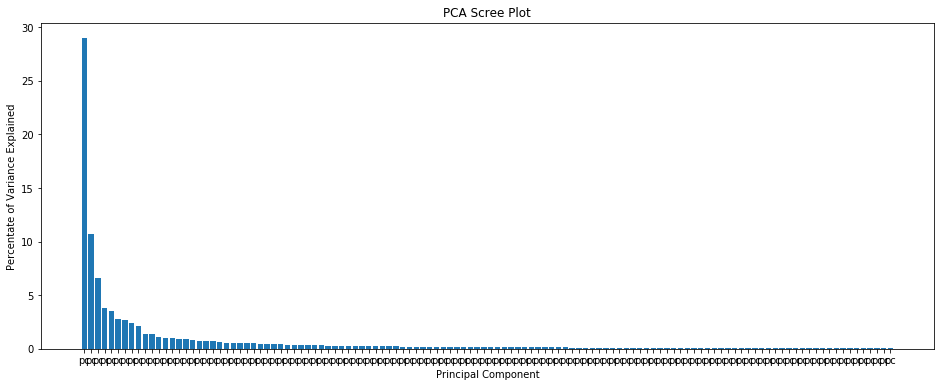

In [36]:
plt.figure(figsize=(16, 6))
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ["pc" for i in range(120)]
plt.bar(x= range(1,121), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()